✅ 'ver 2/test_predictions.csv' 파일에서 2000개의 예측 결과를 불러왔습니다.

--- 모델 성능 지표 ---
정확도 (Accuracy):  0.4995
정밀도 (Precision): 0.4997
재현율 (Recall):   0.9960
F1 점수 (F1 Score): 0.6656
ROC AUC:          0.5342
--------------------

✅ 혼동 행렬 이미지가 'confusion_matrix.png' 파일로 저장되었습니다.


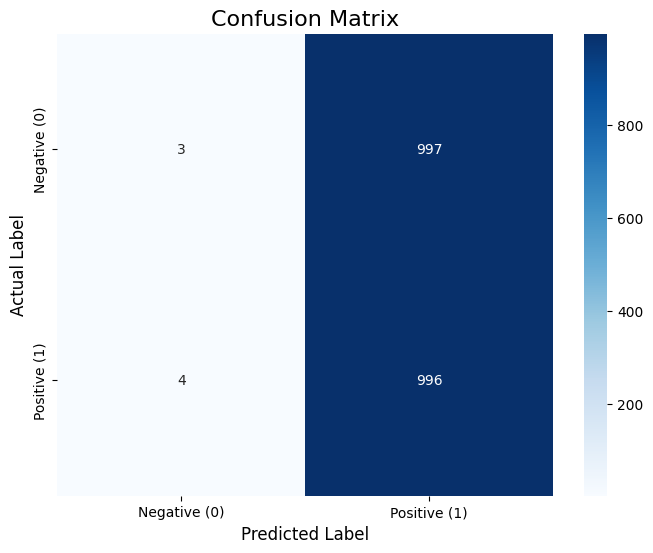

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_predictions(csv_path: str):
    """
    예측 결과 CSV 파일을 읽어 성능 지표를 계산하고,
    혼동 행렬을 이미지로 저장합니다.
    
    Args:
        csv_path (str): 예측 결과가 담긴 CSV 파일 경로
    """
    try:
        # 1. CSV 파일 로드
        df = pd.read_csv(csv_path)
        print(f"✅ '{csv_path}' 파일에서 {len(df)}개의 예측 결과를 불러왔습니다.")
        
        # 실제 레이블과 예측 레이블, 예측 확률을 추출합니다.
        y_true = df['actual_label']
        y_pred = df['final_prediction']
        y_prob = df['predicted_probability']

        # 2. 성능 지표 계산
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_true, y_prob)

        print("\n--- 모델 성능 지표 ---")
        print(f"정확도 (Accuracy):  {accuracy:.4f}")
        print(f"정밀도 (Precision): {precision:.4f}")
        print(f"재현율 (Recall):   {recall:.4f}")
        print(f"F1 점수 (F1 Score): {f1:.4f}")
        print(f"ROC AUC:          {roc_auc:.4f}")
        print("--------------------")

        # 3. 혼동 행렬(Confusion Matrix) 생성
        cm = confusion_matrix(y_true, y_pred)
        
        # 4. 혼동 행렬 시각화 및 이미지 파일로 저장
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative (0)', 'Positive (1)'],
                    yticklabels=['Negative (0)', 'Positive (1)'])
    
        plt.title('Confusion Matrix', fontsize=16)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('Actual Label', fontsize=12)
        
        # 이미지 파일로 저장
        output_filename = 'confusion_matrix.png'
        plt.savefig(output_filename)
        
        print(f"\n✅ 혼동 행렬 이미지가 '{output_filename}' 파일로 저장되었습니다.")
        
        # (선택 사항) 주피터 노트북 환경에서 바로 이미지를 보려면 아래 주석을 해제하세요.
        # plt.show()

    except FileNotFoundError:
        print(f"\n[오류] 파일을 찾을 수 없습니다: '{csv_path}'")
    except KeyError as e:
        print(f"\n[오류] CSV 파일에 필요한 컬럼이 없습니다: {e}")
    except Exception as e:
        print(f"\n[오류] 처리 중 예상치 못한 문제가 발생했습니다: {e}")


if __name__ == '__main__':
    # 예측 결과 파일 경로를 지정합니다.
    prediction_file = "ver 2/test_predictions.csv"
    evaluate_predictions(prediction_file)